# I0. Introducción

En esta sesión se trabajará en algunas simulaciones y conceptos que serán utilizados tanto en el compoente práctico como el teórico de la asignatura:
+ Ondas y partículas clásicas.
+ Características de la función de onda sinusoidal.
+ Ecuación diferencial de una onda armónica.

## 1. Ondas y partículas clásicas

### 1.1. Trayectoria de una pelota modelada como partícula clásica
Suponga que usted está en una cancha de basquetbol y usted lanza la pelota en dirección y sentido hacia la canasta.  Cuando la pelota sale de su mano inicia el movimiento, cuya trayectoria corresponde con una parábola.  Para describir el movimiento de la pelota, se puede asumir la pelota como una partícula clásica, la cual corresponde con un punto en el espacio, al cual se le asocian ciertas características.

Si $h$ es su algura; $H$, la altura de la canastael; $\theta$, ángulo de salida de la pelota; $V_0$, la velocidad inicial y D, la distancia (horizontal) al tablero, entonces, la trayectoria de la partícula con la cual se describe la pelota se puede calcular con la siguiente ecuación:

$$x = [V_0 cos(\theta)] t$$
$$y = h + [V_0 sen(\theta)]t - \frac{1}{2} g t^2$$

Note que: 
$$D = [V_0 cos(\theta)] t_v$$
$$H = h + [V_0 sen(\theta)]t_v - \frac{1}{2} g t_v^2$$

Entonces, $$t_v = \frac{D}{V_0 cos(\theta)}$$
$$H - h = D tan(\theta) - \frac{1}{2} g \left(\frac{D}{V_0}\right)^2 [1 + tan^2(\theta)]$$

#### Si se conoce el ángulo $\theta$ y se quiere calcular la velocidad inicial $V_0$.
$$V_0 = \sqrt{ \frac{g[1 + tan^2(\theta)]D^2}{2[ Dtan(\theta)-H+h ]} }$$

In [1]:
import numpy as np # Módulo con métodos para manipulación numérica
import matplotlib.pyplot as plt # Módulo para graficar

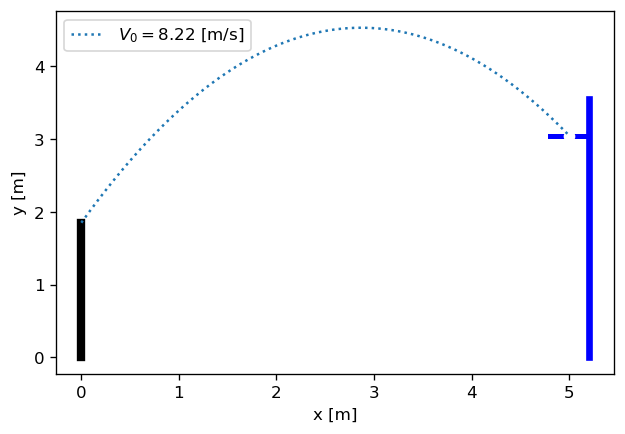

In [2]:
#### Datos conocidos ####
h  =  1.85 # m
H  =  3.05 # m
D  =  5.00 # m
theta = 55*np.pi/160 # ángulo de salida en radianes
g  =  9.80 # m/s^2
#########################
#### Cálculo de la velocidad de salida ####
tan = np.tan(theta)
numerador = g*(1 + tan**2) * D**2
denominador = 2 * (D * tan - H + h)
Vo_2 = numerador/denominador
Vo = np.sqrt(Vo_2)
label = r'$V_0 = %0.2f$ [m/s]' % (Vo)
###########################################
### Cálculo del tiempo de vuelo ###
tv = D / (Vo * np.cos(theta))
###################################
#### Cálculo de la trayectoria ####
t = np.linspace(0,tv,1000) # s.  La variable t tiene 1000 valores de tiempo, inicia en 0 y termina en tv.
x = Vo * t * np.cos(theta) # m
y = h + Vo * t * np.sin(theta) - (1/2)*g*(t**2) # m
###################################
plt.figure(dpi=120)
#plt.gca().axis('equal') # Ejes iguales, es decir, con la misma escala
#### Representación de la persona ####
plt.plot(2*[0], [0, h], 'k', lw=5)
######################################
##### Representación de la canasta #####
plt.plot(2*[D+0.2], [0, H+0.5], 'b', lw=4)
plt.plot([D-0.2, D+0.2], [H, H], 'b', lw=3)
plt.plot([D], [H], 'wo', ms=30/x.max())
########################################
### Gráfica de la trayectoria de la partícula ###
plt.plot(x, y, ':', label=label)
plt.xlabel('x [m]')
plt.ylabel('y [m]')
#################################################
_ = plt.legend()

#### Si se conoce la velocidad inicial $V_0$ y se quiere calcular el ángulo $\theta$.

En este caso, si se hace $\gamma = tan(\theta)$, $a=\frac{1}{2} g \left(\frac{D}{V_0}\right)^2$, $b=-D$ y $c = H-h+\frac{1}{2} g \left(\frac{D}{V_0}\right)^2 $, entonces, la ecuación anterior toma la forma $a\gamma^2+b\gamma+c=0$, por lo tanto,

$$\theta = tan^{-1}\left[ \frac{-b \pm \sqrt{b^2 - 4ac}}{2a} \right]$$

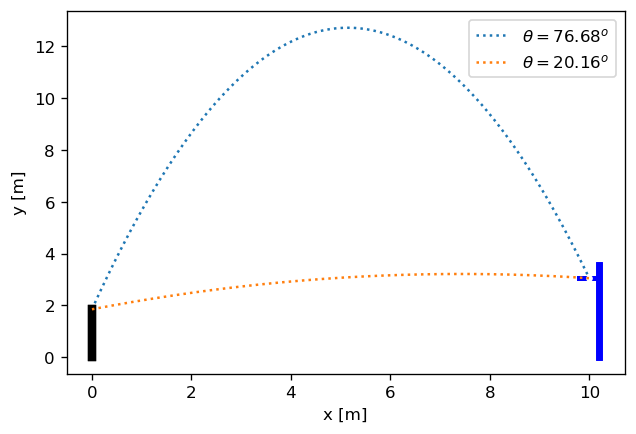

In [3]:
#### Datos conocidos ####
h  =  1.85 # m
H  =  3.05 # m
D  =  10.00 # m
Vo = 15.00 # m/s
g  =  9.80 # m/s^2
#########################
#### Cálculo del ángulo de salida ####
a = (1/2)*g*(D/Vo)**2
b = -D
c = H - h + a
gamma_1 = (-b + np.sqrt(b**2 - 4 * a * c))/(2 * a)
gamma_2 = (-b - np.sqrt(b**2 - 4 * a * c))/(2 * a)
plt.figure(dpi=120)
#plt.gca().axis('equal') # Ejes iguales, es decir, con la misma escala
Theta = []
for gamma in [gamma_1, gamma_2]:
    theta = np.abs(np.arctan(gamma)) # ángulo de salida en radianes
    Theta.append(theta)
    label = r'$\theta = %0.2f ^o$' % (theta*180/np.pi)
    ######################################
    ### Cálculo del tiempo de vuelo ###
    tv = D / (Vo * np.cos(theta))
    ###################################
    #### Cálculo de la trayectoria ####
    t = np.linspace(0,tv,1000) # s.  La variable t tiene 1000 valores de tiempo, inicia en 0 y termina en tv.
    x = Vo * t * np.cos(theta) # m
    y = h + Vo * t * np.sin(theta) - (1/2)*g*(t**2) # m
    ###################################
    #### Representación de la persona ####
    plt.plot(2*[0], [0, h], 'k', lw=5)
    ######################################
    ##### Representación de la canasta #####
    plt.plot(2*[D+0.2], [0, H+0.5], 'b', lw=4)
    plt.plot([D-0.2, D+0.2], [H, H], 'b', lw=3)
    plt.plot([D], [H], 'wo', ms=30/x.max())
    ########################################
    ### Gráfica de la trayectoria de la partícula ###
    plt.plot(x, y, ':', label=label)
    plt.xlabel('x [m]')
    plt.ylabel('y [m]')
    #################################################
_ = plt.legend()

### 1.2. Función de onda de una onda armónica
Suponga que observa una onda en el agua.  Si observa cuidadosamente la onda y grafica la altura del agua $\psi$ en función del tiempo para una distancia igual a dos veces la longitud de onda, en una dirección correspondiente a una cierta línea recta, obsería una onda aproximadamente armónica.

[0.0, 20.0, -4.399988256374675, 4.399998145742839]

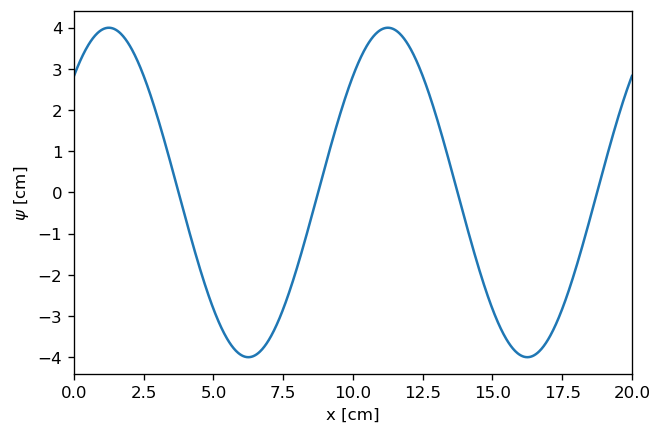

In [4]:
longitud_onda = 10 # cm
num_periodos  = 2
amplitud = 4 # cm
fase = 45 * np.pi / 180 # radianes

x = np.linspace(0, 2*longitud_onda, 1000)
psi = amplitud * np.sin(2 * np.pi * x / longitud_onda +  fase)

plt.figure(dpi=120)
plt.plot(x, psi)
plt.xlabel('x [cm]')
_ = plt.ylabel(r'$\psi$ [cm]')
plt.axis([min(x), max(x)]+list(plt.axis())[2:])

### 1.3. Comparación de ondas y partículas

| Característica  | Partícula  | Onda | 
|:-:|:-:|:-:|
| Interacción  | Intercambio de energía o momentum | Superposición  |
| Representación  | Punto en el espacio  | Función de onda = onda  |
|   |   |   |

## 2. Características de la función de onda sinusoidal.
Una función sinusoidal $\psi(\vec{r}, t) = A sin[\theta(\vec{r}, t)]$ es definida completamente por dos parámetros:
+ $A$: es la amplitud de la onda.
+ $\theta$: corresponde al ángulo, el cual puede variar en el tiempo, la posición o ambas.

### 2.1. Función sinusoidal dependiente del tiempo e independiente de la posición
En este caso, la función sinusoidal está dada por:

$$\psi(t) = \psi_0 sin(\omega t + \phi)$$

Donde,
+ $\psi_0$ es la amplitud de la onda.
+ $\omega$ es la frecuencia angular.  Otros dos parámetros asociados son el periodo $T$ y la frecuencia $f$, los cuales están relacionados por dos ecuaciones: 
  + $T = \frac{1}{f}$
  + $\omega = 2\pi f$
+ $\phi$ es la fase de la onda.  Tenga en cuenta que la fase está en radianes, sin embargo, en la gráfica de la función de onda se observa es tiempo.  Esta fase está asociada con un tiempo de fase $t_\phi = \phi / \omega$. 

[0.0, 3.0, -4.4, 4.4]

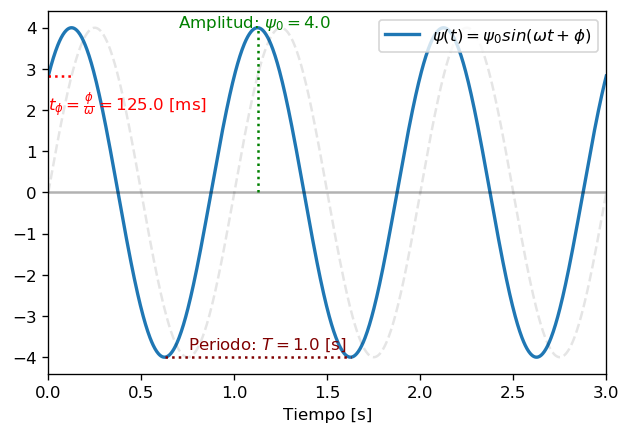

In [5]:
#### Parámetros de la función de onda ####
T = 1 # s
psi_0 = 4
phi = 45 * np.pi/180 # fase en radianes
##########################################
#### Construcción de la función de onda psi ####
f = 1/T
w = 2*np.pi*f
t = np.linspace(0, 3*T, 1000)
psi = psi_0 * np.sin(w*t + phi)
################################################
##### Gráfica de la función de onda #####
plt.figure(dpi=120)
plt.plot(t, psi, lw=2, label=r'$\psi(t)=\psi_0 sin(\omega t + \phi)$')
plt.xlabel('Tiempo [s]')
#########################################
##### Gráfica de carácteristicas relevantes #####
ref = psi_0 * np.sin(w*t) # Función de referencia, para mostrar la fase
plt.plot(t, ref, '--k', alpha = 0.1)
plt.plot(t, 0*t, 'k', alpha = 0.3)
plt.plot([T/2 + phi/w, 3*T/2 + phi/w], 2*[-psi_0], ':', color='maroon') # Periodo
plt.text(3*T/4, -0.95*psi_0, r'Periodo: $T=%0.1f$ [s]' % (T), color='maroon')
plt.plot(2*[T + phi/w], [0, psi_0], ':g') # Amplitud
plt.text(0.7*T, psi_0, r'Amplitud: $\psi_0 = %0.1f$' % psi_0, color='g')
plt.plot([0, phi/w], 2*[psi[0]], 'r:') # Tiempo de fase
plt.text(0, 0.7*psi[0], r'$t_\phi = \frac{\phi}{\omega}=%0.1f$ [ms]' % (1e3*phi/w), color='r')
#################################################
_ = plt.legend(loc=1)
plt.axis([min(t), max(t)]+list(plt.axis())[2:])

### 2.2. Función sinusoidal dependiente de la posición e independiente del tiempo
Cuando la función de onda depende de la posición, $x$ y el tiempo $t$, la función de onda armónica (sinusoidal) está dada por:

$$\psi(x, t) = \psi_0 sin(k x + \phi)$$

Donde,
+ $\psi_0$ es la amplitud de la onda.
+ $k$ es el número de onda.  Otros dos parámetros asociados son la longitud de onda $\lambda$ y la frecuencia espacial $\nu$.
  + $\lambda = \frac{1}{\nu}$
  + $k = 2\pi \nu$
+ $\phi$ es la fase de la onda.  Tenga en cuenta que la fase está en radianes, sin embargo, en la gráfica de la función de onda se observa la posición.  Esta fase está asociada con una longitud de fase $x_\phi = \phi / k$.  de onda se observa la posición.  Esta fase está asociada con una longitud de fase $x_\phi = \phi / k$. 

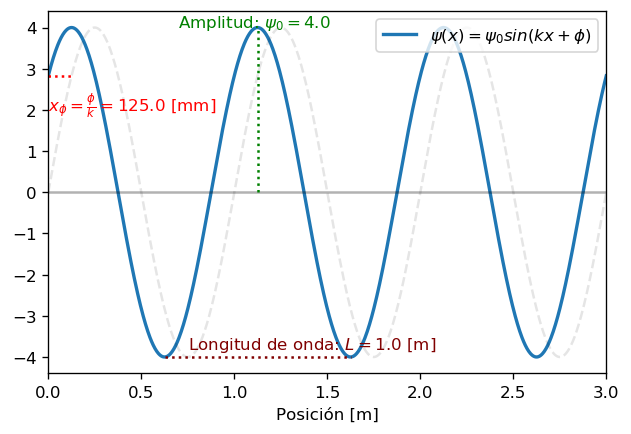

In [6]:
#### Parámetros de la función de onda ####
L = 1 # s
psi_0 = 4
phi = 45 * np.pi/180 # fase en radianes
##########################################
#### Construcción de la función de onda psi ####
nu = 1/L
k = 2*np.pi*nu
x = np.linspace(0, 3*L, 1000)
psi = psi_0 * np.sin(k*x + phi)
################################################
##### Gráfica de la función de onda #####
plt.figure(dpi=120)
plt.plot(x, psi, lw=2, label=r'$\psi(x)=\psi_0 sin(k x + \phi)$')
plt.xlabel('Posición [m]')
#########################################
##### Gráfica de carácteristicas relevantes #####
ref = psi_0 * np.sin(k*x) # Función de referencia, para mostrar la fase
plt.plot(x, ref, '--k', alpha = 0.1)
plt.plot(x, 0*x, 'k', alpha = 0.3)
plt.plot([L/2 + phi/k, 3*L/2 + phi/k], 2*[-psi_0], ':', color='maroon') # Periodo
plt.text(3*L/4, -0.95*psi_0, r'Longitud de onda: $L=%0.1f$ [m]' % (L), color='maroon')
plt.plot(2*[L + phi/k], [0, psi_0], ':g') # Amplitud
plt.text(0.7*L, psi_0, r'Amplitud: $\psi_0 = %0.1f$' % psi_0, color='g')
plt.plot([0, phi/k], 2*[psi[0]], 'r:') # Tiempo de fase
plt.text(0, 0.7*psi[0], r'$x_\phi = \frac{\phi}{k}=%0.1f$ [mm]' % (1e3*phi/k), color='r')
#################################################
_ = plt.legend(loc=1)
_ = plt.axis([min(x), max(x)]+list(plt.axis())[2:])

### 2.3. Función sinusoidal dependiente de la posición $x$ y el tiempo $t$
Cuando la función de onda depende de la posición, $x$ y el tiempo $t$, la función de onda armónica (sinusoidal) está dada por:

$$\psi(x, t) = \psi_0 sin(\omega t - k x + \phi)$$

Donde,
+ $\psi_0$ es la amplitud de la onda.
+ $k$ es el número de onda.  Otros dos parámetros asociados son la longitud de onda $\lambda$ y la frecuencia espacial $\nu$, los cuales están relacionados por dos ecuaciones: 
  + $ \lambda= \frac{1}{\nu}$
  + $k = 2\pi \nu$
+ $\omega$ es la frecuencia angular.  Otros dos parámetros asociados son el periodo $T$ y la frecuencia $f$, los cuales están relacionados por dos ecuaciones: 
  + $T = \frac{1}{f}$
  + $\omega = 2\pi f$
+ $\phi$ es la fase de la onda, la cual puede depender de la posición, el tiempo o ambas. 
+ La velocidad de fase $c$ de la onda sinusoidal está determinada por la frecuencia y la longitud de onda: $c = \lambda f = \omega / k$.

## 3. Ecuación diferencial de una onda armónica.
Sea una onda armónica cuya función de onda está dada por: $$\psi(x) = \psi_0 sen(kx + \phi)$$

La primera derivada de la función de onda está dada por: $$\frac{d\psi(x)}{dx} = k \psi_0 cos(kx + \phi)$$

La segunda derivada de la función de onda está dada por: $$\frac{d^2\psi(x)}{dx^2} = - k^2 \psi_0 sen(kx + \phi) = - k^2 \psi(x)$$

Entonces, se obtiene la siguiente ecuación diferencial: $$\frac{d^2\psi(x)}{dx^2} + k^2 \psi(x) = 0$$

End!